In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import math
from math import sqrt

from scipy.stats import ks_2samp, chi2_contingency, pearsonr, f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,classification_report
from sklearn.metrics import r2_score, precision_recall_fscore_support

#ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.dates as mdates
import calendar
from statsmodels.graphics.tsaplots import month_plot

In [2]:
# Importing the dataset
df_passengers = pd.read_csv('/Users/diogomonteiro/Documents/Education/CCT/Summer BootCamp/Diploma in Predictive Analytics/CA/Question 3/AirPassengers.csv')
df_passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Renaming the '#Passengers' column to 'Passengers'
df_passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [4]:
df_passengers.shape

(144, 2)

In [5]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df_passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df_passengers.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
# Convert 'Month' to datetime with the correct format
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])

# Display the modified DataFrame
df_passengers.head(1)

,Month,Passengers
0,1949-01-01,112


In [9]:
# Set 'Month' as the index
df_passengers.set_index('Month', inplace=True)

In [10]:
df_passengers.head(1)

,Passengers
Month,
1949-01-01,112


In [11]:
# Exploring the dates
df_passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
df_passengers.head(1)

,Passengers
Month,
1949-01-01,112


In [13]:
# by analysing the dates, it should be Monthly but freq=None
# setting up freq = M
# Setting the frequency to Month Start ('MS') to align with the original dates
df_passengers = df_passengers.asfreq('MS')
df_passengers.index

# if there's duplicates dates, this will return an error

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [14]:
df_passengers.head(1)

,Passengers
Month,
1949-01-01,112


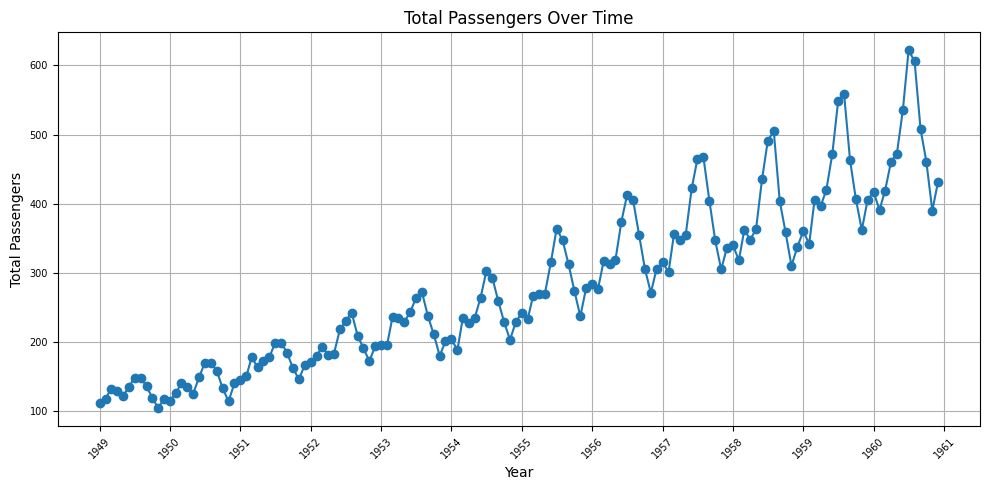

In [15]:
#We visualise the data

plt.figure(figsize=(10, 5))
plt.plot(df_passengers.index, df_passengers['Passengers'], marker='o')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Passengers', fontsize=10)
plt.title('Total Passengers Over Time')
plt.grid(True)
plt.xticks(df_passengers.index, rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

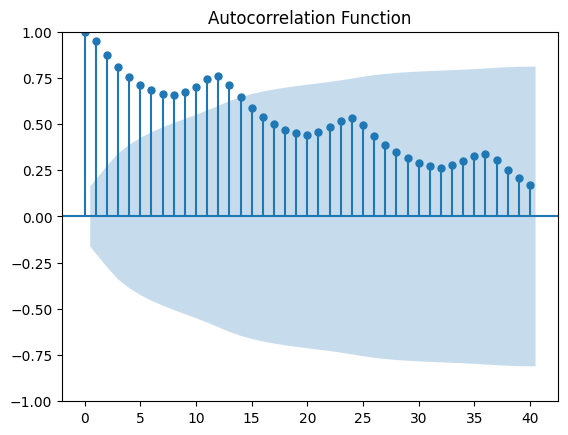

<Figure size 1400x500 with 0 Axes>

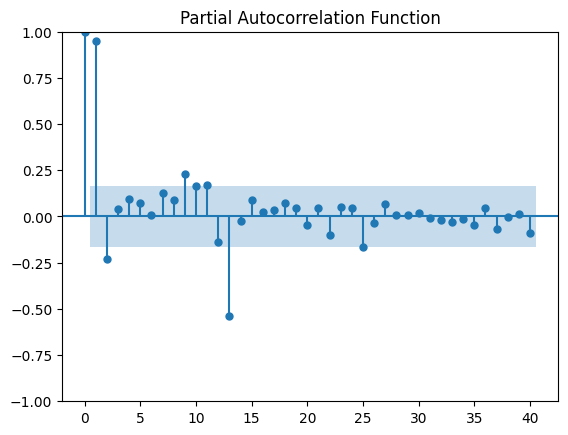

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = df_passengers['Passengers']

# Plot ACF
plt.figure(figsize=(14, 5))
plot_acf(ts, lags=40, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(14, 5))
plot_pacf(ts, lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

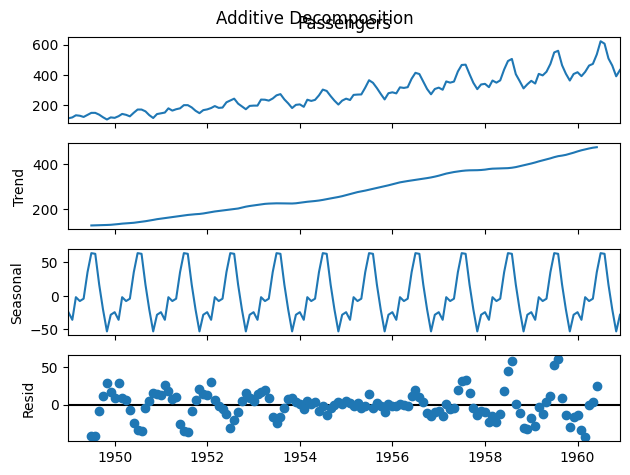

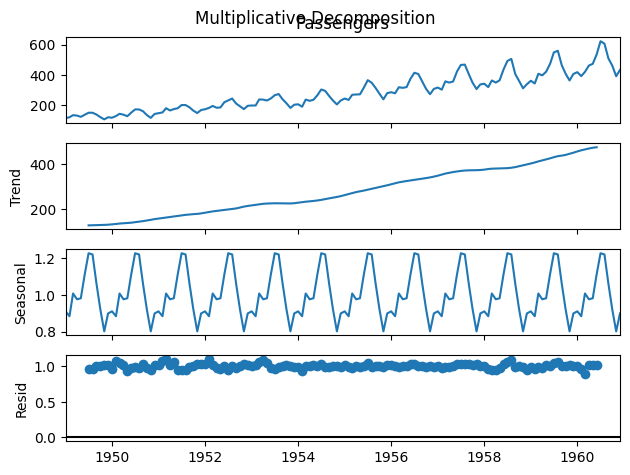

In [17]:

df_passengers.index = pd.to_datetime(df_passengers.index)
if not df_passengers.index.freq:
    df_passengers = df_passengers.asfreq('M')  # Set to monthly frequency

# Decomposing with explicitly defining the period for monthly data
try:
    # Decomposition with explicit period setting
    # Additive Decomposition
    result_add = seasonal_decompose(df_passengers['Passengers'], model='additive', period=12)
    fig_add = result_add.plot()
    fig_add.suptitle('Additive Decomposition')
    plt.show()

    # Multiplicative Decomposition
    result_mul = seasonal_decompose(df_passengers['Passengers'], model='multiplicative', period=12)
    fig_mul = result_mul.plot()
    fig_mul.suptitle('Multiplicative Decomposition')
    plt.show()
except Exception as e:
    print("Decomposition failed:", e)

In [18]:
decomposition = seasonal_decompose(df_passengers['Passengers'],model = 'multiplicative', period = 12)

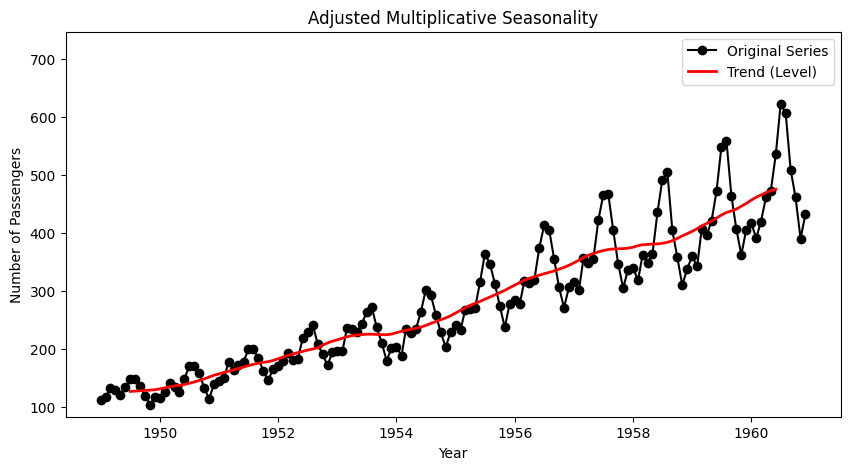

In [19]:
# Decompose the time series
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()

# Plotting with adjusted bounds
plt.figure(figsize=(10, 5))
plt.plot(df_passengers.index, df_passengers['Passengers'], label='Original Series', color='black', marker='o')
plt.plot(trend.index, trend, label='Trend (Level)', color='red', linewidth=2)
plt.title('Adjusted Multiplicative Seasonality')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.ylim([min(df_passengers['Passengers'])*0.8, max(df_passengers['Passengers'])*1.2])
plt.legend()
plt.show()

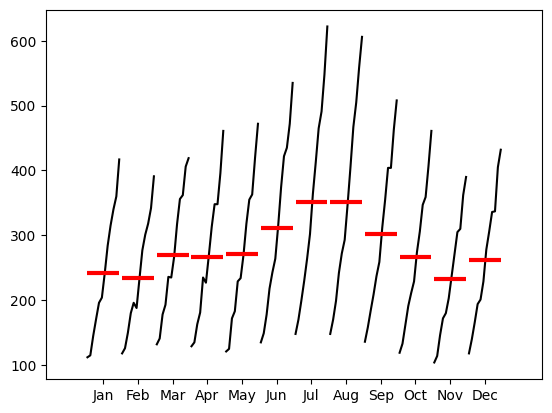

In [20]:
month_plot(df_passengers.Passengers.resample(rule= 'MS').mean())
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

#To check the seasonality of the data we need to do a hypothesis test --> Ducky Fuller test

# H0: the data is not stationary
# H1 : the data is stationary

#We conduct the test
result = adfuller(df_passengers['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation based on the p-value
if result[1] < 0.05:
    print('Rejecting the null hypothesis, the data is stationary.')
    print('Suitable models include ARIMA or SARIMA')
else:
    print('Accepting the null hypothesis, the data is non-stationary.')
    print('Sarimax or TBATS which handles non-stationarity internally.')


ADF Statistic: 0.8153688792060371
p-value: 0.9918802434376408
Accepting the null hypothesis, the data is non-stationary.
Sarimax or TBATS which handles non-stationarity internally.


### Holt Winters Model

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_size = int(len(df_passengers)*0.8)
train,test = df_passengers.iloc[:train_size],df_passengers.iloc[train_size:]

# Fit the model on the training data
model = ExponentialSmoothing(train['Passengers'],
                             trend='multiplicative',
                             seasonal='multiplicative',
                             seasonal_periods=12).fit()

# Forecast the next 12 months
forecasts = model.forecast(steps=12)
forecasts

1958-08-01    487.179279
1958-09-01    429.482652
1958-10-01    374.824311
1958-11-01    329.244202
1958-12-01    372.591675
1959-01-01    381.143127
1959-02-01    369.846929
1959-03-01    428.496014
1959-04-01    417.236288
1959-05-01    423.435429
1959-06-01    491.894016
1959-07-01    548.806332
Freq: MS, dtype: float64

In [23]:
# Calculate MSE
mse_hw = np.mean((test['Passengers'] - forecasts) ** 2)
print(f"MSE: {mse_hw}")

# Calculate RMSE
rmse_hw = np.sqrt(mse_hw)
print(f"RMSE: {rmse_hw}")

# Calculate MAE
mae_hw = np.mean(np.abs(test['Passengers'] - forecasts))
print(f"MAE: {mae_hw}")

# Calculate MAPE
mape_hw = np.mean(np.abs((test['Passengers'] - forecasts) / test['Passengers'])) * 100
print(f"MAPE: {mape_hw:.2f}%")

MSE: 453.51810171074004
RMSE: 21.295964446597388
MAE: 19.23514142764628
MAPE: 5.09%


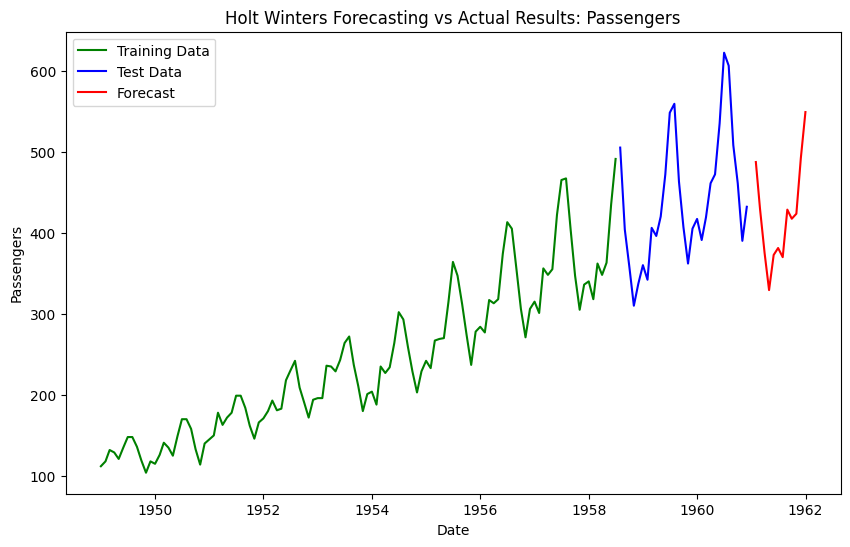

In [24]:
# Assuming test data's time index is properly set and continuous
last_date = test.index[-1]  # Get the last date of the test set

# Create an index for the forecasts that starts the month following the last date in the test data
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecasts), freq='M')

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data', color='green')
plt.plot(test.index, test['Passengers'], label='Test Data', color='blue')
plt.plot(forecast_index, forecasts, label='Forecast', color='red')

# If your model provides confidence intervals, you can plot them like this:
if 'conf_int' in locals() or 'conf_int' in globals():
    plt.fill_between(forecast.conf_int().index,
                     forecast.conf_int().iloc[:, 0],
                     forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)

plt.title('Holt Winters Forecasting vs Actual Results: Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

### SARIMAX

In [25]:
train_size = int(len(df_passengers)*0.8)
train,test = df_passengers.iloc[:train_size],df_passengers.iloc[train_size:]

In [26]:
#Fitting SARIMAX model on training data for 30 days (monthly)
order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 30) 

In [27]:
model = SARIMAX(train['Passengers'], order=order, seasonal_order=seasonal_order)
results = model.fit()

#Model summary
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60188D+00    |proj g|=  3.53913D-01


 This problem is unconstrained.



At iterate    5    f=  3.48448D+00    |proj g|=  3.10091D-02

At iterate   10    f=  3.46539D+00    |proj g|=  2.72140D-02

At iterate   15    f=  3.39780D+00    |proj g|=  2.21157D-03

At iterate   20    f=  3.39622D+00    |proj g|=  9.92976D-03

At iterate   25    f=  3.38350D+00    |proj g|=  2.78438D-02

At iterate   30    f=  3.37710D+00    |proj g|=  5.66666D-03

At iterate   35    f=  3.36996D+00    |proj g|=  2.30501D-02

At iterate   40    f=  3.36587D+00    |proj g|=  7.29678D-03

At iterate   45    f=  3.36573D+00    |proj g|=  3.84438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     58   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -387.059
Date:                            Wed, 07 Aug 2024   AIC                            784.118
Time:                                    09:50:00   BIC                            796.272
Sample:                                01-01-1949   HQIC                           789.003
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      0.409      0.610      0.542      -0.552       1.051
ma.L1          0.1069      0.410      0.261      0.794      -0.697       0.911
ar.S.L30      -0.7859      0.181     -4.347      0.000      -1.140      -0.432
ma.S.L30      -0.0502      0.364     -0.138      0.890      -0.764       0.664
sigma2       405.4673     77.686      5.219      0.000     253.205     557.730
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.99   Prob(JB):                         0.39
Heteroskedasticity (H):               3.55   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

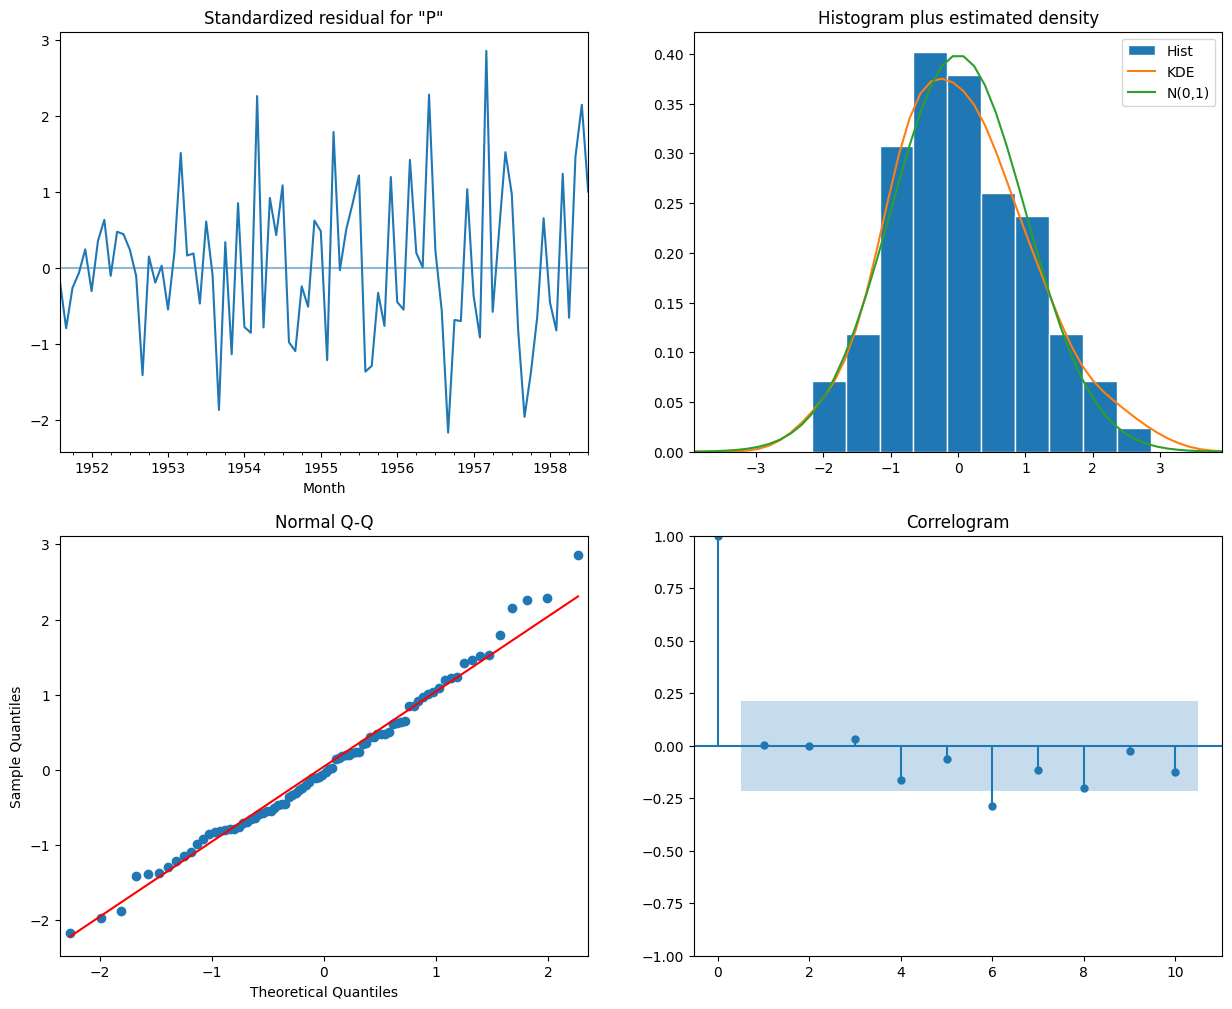

In [28]:
#Diagnostic
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
#Forecasting for the test period
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean.round()
forecast_values.index = test.index

In [30]:
#Accuracy
mae_sarimax = mean_absolute_error(test['Passengers'], forecast_values).round()
print('MAE:',mae_sarimax)
mse_sarimax = mean_squared_error(test['Passengers'], forecast_values).round()
print('MSE:',mse_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax).round()
print('RMSE:',rmse_sarimax)

#In case there are zeros in the division as before
non_zero_test = test['Passengers'] != 0
filtered_test = test['Passengers'][non_zero_test]
filtered_forecast = forecast_values[non_zero_test]

mape_sarimax = np.mean((np.abs((filtered_test - filtered_forecast) / filtered_test)) * 100).round()
print('MAPE:',mape_sarimax)

MAE: 77.0
MSE: 7591.0
RMSE: 87.0
MAPE: 20.0


In [31]:
# Results of forecasting in table
forecast_df_quantity = pd.DataFrame({
    'Forecast': forecast.predicted_mean.round(),
})
print(forecast_df_quantity)

            Forecast
1958-08-01     508.0
1958-09-01     491.0
1958-10-01     470.0
1958-11-01     446.0
1958-12-01     473.0
1959-01-01     482.0
1959-02-01     468.0
1959-03-01     497.0
1959-04-01     481.0
1959-05-01     481.0
1959-06-01     511.0
1959-07-01     543.0
1959-08-01     534.0
1959-09-01     516.0
1959-10-01     491.0
1959-11-01     471.0
1959-12-01     504.0
1960-01-01     522.0
1960-02-01     516.0
1960-03-01     531.0
1960-04-01     523.0
1960-05-01     516.0
1960-06-01     558.0
1960-07-01     597.0
1960-08-01     580.0
1960-09-01     561.0
1960-10-01     529.0
1960-11-01     501.0
1960-12-01     546.0


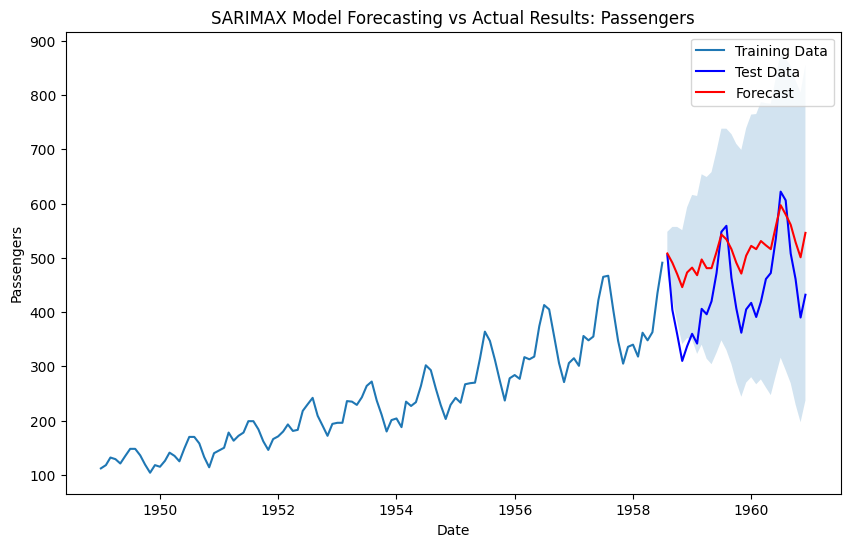

In [32]:
# Comparing actual model with the forecasting
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Test Data', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast.conf_int().index, 
                 forecast.conf_int().iloc[:, 0].round(), 
                 forecast.conf_int().iloc[:, 1].round(), alpha=0.2)
plt.title('SARIMAX Model Forecasting vs Actual Results: Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()


## TBATS

In [33]:
train_size = int(len(df_passengers)*0.8)
train,test = df_passengers.iloc[:train_size],df_passengers.iloc[train_size:]

In [34]:
from tbats import TBATS

# Preparing train and test data
train_data = train['Passengers']
test_data = test['Passengers']

# Create a TBATS estimator
estimator = TBATS(seasonal_periods=[12])

# Fit the model
model = estimator.fit(train_data)

# Forecast forward, e.g., for the next 12 months
forecasts = model.forecast(steps=12)

# Print or plot the forecasts
print("Forecasted values:", forecasts)

Forecasted values: [482.12622967 431.9758383  375.68608607 331.16846855 375.25437951
 384.56359742 381.65716463 443.25280574 427.00200616 429.67654499
 489.09392975 547.04957092]


In [35]:
# Check lengths to decide correct number of forecast steps
print("Length of test data: ", len(test_data))
print("Length of forecasts currently: ", len(forecasts))

# If lengths do not match, regenerate forecasts with correct length
if len(test_data) != len(forecasts):
    forecasts = model.forecast(steps=len(test_data))
    print("Forecasts regenerated to match test data length.")
    
print("Forecasted values:", forecasts)

Length of test data:  29
Length of forecasts currently:  12
Forecasts regenerated to match test data length.
Forecasted values: [482.12622967 431.9758383  375.68608607 331.16846855 375.25437951
 384.56359742 381.65716463 443.25280574 427.00200616 429.67654499
 489.09392975 547.04957092 539.68347979 483.54602851 420.53628648
 370.70406152 420.05304188 430.47361393 427.22020504 496.1692642
 477.97840976 480.9722407  547.48299866 612.35750698 604.1120363
 541.27277722 470.74079877 414.95949728 470.1998634 ]


In [36]:
# Calculate error metrics
mse_tbats = np.mean((test_data.values - forecasts) ** 2)
rmse_tbats = np.sqrt(mse_tbats)
mae_tbats = np.mean(np.abs(test_data.values - forecasts))
mape_tbats = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

# Printing the error metrics
print(f"MSE: {mse_tbats}")
print(f"RMSE: {rmse_tbats}")
print(f"MAE: {mae_tbats}")
print(f"MAPE: {mape_tbats:.2f}%")

MSE: 725.592202670239
RMSE: 26.936818718442588
MAE: 22.321071889594762
MAPE: 5.44%


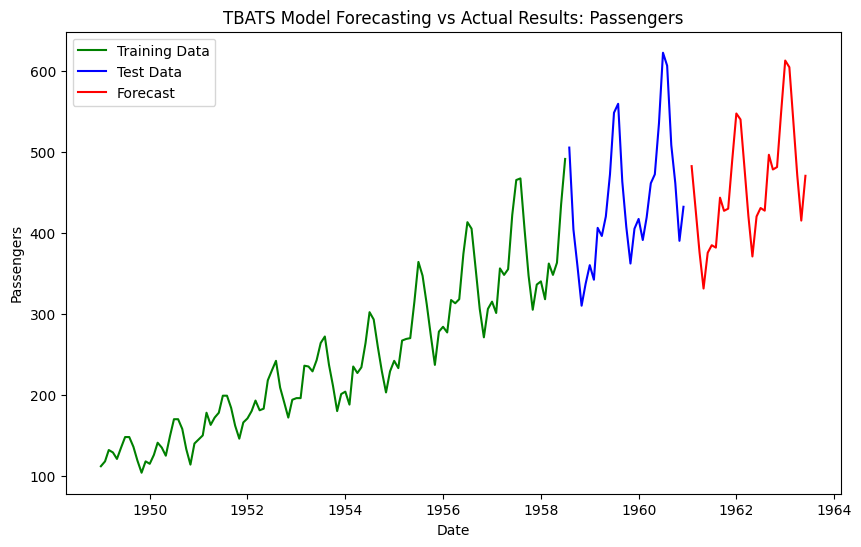

In [37]:
# Last date from the test set
last_date = test.index[-1]

# This assumes that 'forecasts' are for the next 12 months after the test set ends
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecasts), freq='M')

# Now plot
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data', color='green')
plt.plot(test.index, test['Passengers'], label='Test Data', color='blue')
plt.plot(forecast_index, forecasts, label='Forecast', color='red')  # Ensure this line is corrected
plt.title('TBATS Model Forecasting vs Actual Results: Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

#### One Step Ahead Forecast

One-Step-Ahead TBATS - MSE: 6652.668293934711
One-Step-Ahead TBATS - RMSE: 81.56389087049925
One-Step-Ahead TBATS - MAE: 70.98008504583358
One-Step-Ahead TBATS - MAPE: 14.77%


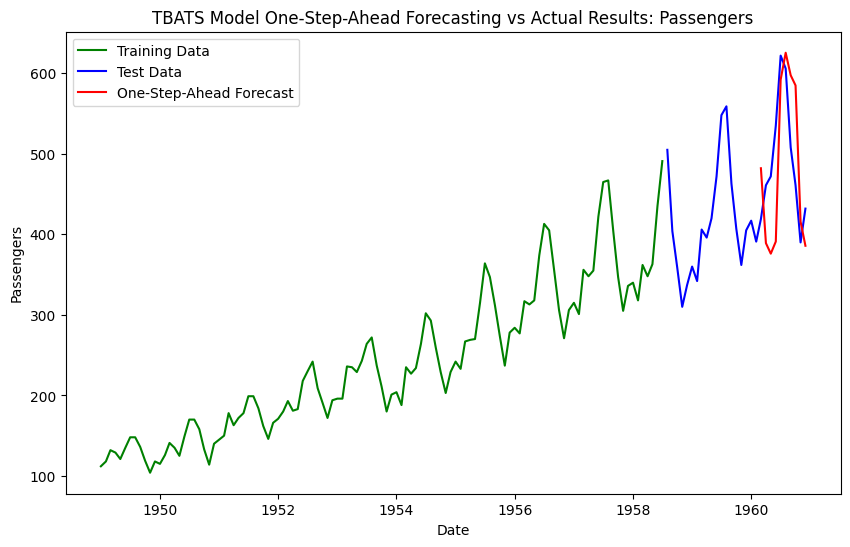

In [38]:
train_size = int(len(df_passengers) * 0.8)
train, test = df_passengers.iloc[:train_size], df_passengers.iloc[train_size:]

train_data = train['Passengers']
test_data = test['Passengers']

# One-Step-Ahead Forecasting for the last 10 observations using TBATS
tbats_forecasts = []
history = train_data.tolist()

for t in range(len(test_data) - 10, len(test_data)):
    model = TBATS(seasonal_periods=[12]).fit(history)
    yhat = model.forecast(steps=1)
    tbats_forecasts.append(yhat[0])
    history.append(test_data.iloc[t])

# Convert forecasts to a Pandas Series with the same index as the test data
tbats_forecasts_series = pd.Series(tbats_forecasts, index=test_data.index[-10:])

# Calculate error metrics for one-step-ahead forecasts
mse_tbats_one_step = np.mean((test_data[-10:].values - tbats_forecasts) ** 2)
rmse_tbats_one_step = np.sqrt(mse_tbats_one_step)
mae_tbats_one_step = np.mean(np.abs(test_data[-10:].values - tbats_forecasts))
mape_tbats_one_step = np.mean(np.abs((test_data[-10:].values - tbats_forecasts) / test_data[-10:].values)) * 100

print(f"One-Step-Ahead TBATS - MSE: {mse_tbats_one_step}")
print(f"One-Step-Ahead TBATS - RMSE: {rmse_tbats_one_step}")
print(f"One-Step-Ahead TBATS - MAE: {mae_tbats_one_step}")
print(f"One-Step-Ahead TBATS - MAPE: {mape_tbats_one_step:.2f}%")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data', color='green')
plt.plot(test.index, test['Passengers'], label='Test Data', color='blue')
plt.plot(tbats_forecasts_series.index, tbats_forecasts_series, label='One-Step-Ahead Forecast', color='red')
plt.title('TBATS Model One-Step-Ahead Forecasting vs Actual Results: Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

One-Step-Ahead Holt-Winters - MSE: 8260.913509906222
One-Step-Ahead Holt-Winters - RMSE: 90.88956766266534
One-Step-Ahead Holt-Winters - MAE: 86.1037288092778
One-Step-Ahead Holt-Winters - MAPE: 17.59%


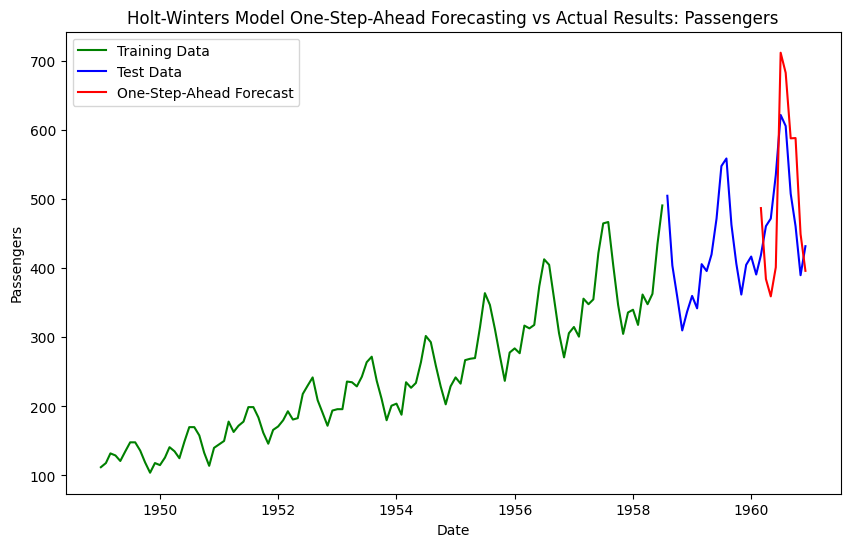

In [39]:
train_size = int(len(df_passengers) * 0.8)
train, test = df_passengers.iloc[:train_size], df_passengers.iloc[train_size:]

train_data = train['Passengers']
test_data = test['Passengers']

# One-Step-Ahead Forecasting for the last 10 observations using Holt-Winters
hw_forecasts = []
history = train_data.tolist()

for t in range(len(test_data) - 10, len(test_data)):
    model = ExponentialSmoothing(history, trend='multiplicative', seasonal='multiplicative', seasonal_periods=12).fit()
    yhat = model.forecast(steps=1)
    hw_forecasts.append(yhat[0])
    history.append(test_data.iloc[t])

# Convert forecasts to a Pandas Series with the same index as the test data
hw_forecasts_series = pd.Series(hw_forecasts, index=test_data.index[-10:])

# Calculate error metrics for one-step-ahead forecasts
mse_hw_one_step = np.mean((test_data[-10:].values - hw_forecasts_series) ** 2)
rmse_hw_one_step = np.sqrt(mse_hw_one_step)
mae_hw_one_step = np.mean(np.abs(test_data[-10:].values - hw_forecasts_series))
mape_hw_one_step = np.mean(np.abs((test_data[-10:].values - hw_forecasts_series) / test_data[-10:].values)) * 100

print(f"One-Step-Ahead Holt-Winters - MSE: {mse_hw_one_step}")
print(f"One-Step-Ahead Holt-Winters - RMSE: {rmse_hw_one_step}")
print(f"One-Step-Ahead Holt-Winters - MAE: {mae_hw_one_step}")
print(f"One-Step-Ahead Holt-Winters - MAPE: {mape_hw_one_step:.2f}%")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Passengers'], label='Training Data', color='green')
plt.plot(test.index, test['Passengers'], label='Test Data', color='blue')
plt.plot(hw_forecasts_series.index, hw_forecasts_series, label='One-Step-Ahead Forecast', color='red')
plt.title('Holt-Winters Model One-Step-Ahead Forecasting vs Actual Results: Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()